In [102]:
!pip install catboost
!pip install wooldridge
import wooldridge as wd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
     
dataset = pd.read_csv('/content/comp_final.csv')
dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,llamadas,minutos,mensajes,datos_usados,plan
0,40.0,311.90,83.0,19915.42,plan_2
1,85.0,516.75,56.0,22696.96,plan_2
2,77.0,467.66,86.0,21060.45,plan_2
3,106.0,745.53,81.0,8437.39,plan_1
4,66.0,418.74,1.0,14502.75,plan_2
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,plan_1
3210,25.0,190.36,0.0,3275.61,plan_2
3211,97.0,634.44,70.0,13974.06,plan_2
3212,64.0,462.32,90.0,31239.78,plan_2


## Análisis exploratorio de datos y preprocesamiento

In [103]:
dataset.head

<bound method NDFrame.head of       llamadas  minutos  mensajes  datos_usados    plan
0         40.0   311.90      83.0      19915.42  plan_2
1         85.0   516.75      56.0      22696.96  plan_2
2         77.0   467.66      86.0      21060.45  plan_2
3        106.0   745.53      81.0       8437.39  plan_1
4         66.0   418.74       1.0      14502.75  plan_2
...        ...      ...       ...           ...     ...
3209     122.0   910.98      20.0      35124.90  plan_1
3210      25.0   190.36       0.0       3275.61  plan_2
3211      97.0   634.44      70.0      13974.06  plan_2
3212      64.0   462.32      90.0      31239.78  plan_2
3213      80.0   566.09       6.0      29480.52  plan_1

[3214 rows x 5 columns]>

In [104]:
dataset.describe()

,llamadas,minutos,mensajes,datos_usados
count,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836
std,33.236368,234.569872,36.148326,7570.968246
min,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500
50%,62.000000,430.600000,30.000000,16943.235000
75%,82.000000,571.927500,57.000000,21424.700000
max,244.000000,1632.060000,224.000000,49745.730000


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   llamadas      3214 non-null   float64
 1   minutos       3214 non-null   float64
 2   mensajes      3214 non-null   float64
 3   datos_usados  3214 non-null   float64
 4   plan          3214 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.7+ KB


In [106]:
dataset.tail()

,llamadas,minutos,mensajes,datos_usados,plan
3209,122.0,910.98,20.0,35124.90,plan_1
3210,25.0,190.36,0.0,3275.61,plan_2
3211,97.0,634.44,70.0,13974.06,plan_2
3212,64.0,462.32,90.0,31239.78,plan_2
3213,80.0,566.09,6.0,29480.52,plan_1


array([[<Axes: title={'center': 'llamadas'}>,
        <Axes: title={'center': 'minutos'}>],
       [<Axes: title={'center': 'mensajes'}>,
        <Axes: title={'center': 'datos_usados'}>]], dtype=object)

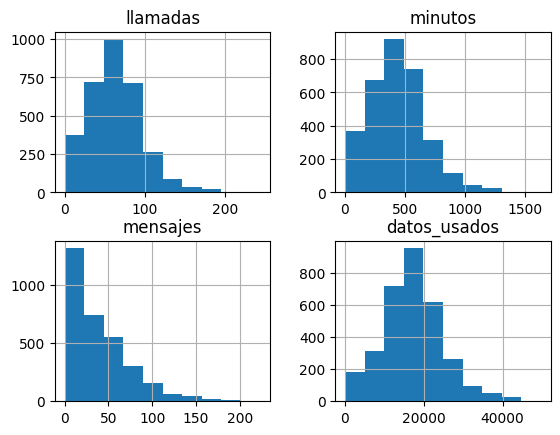

In [107]:
dataset.hist()

<Axes: >

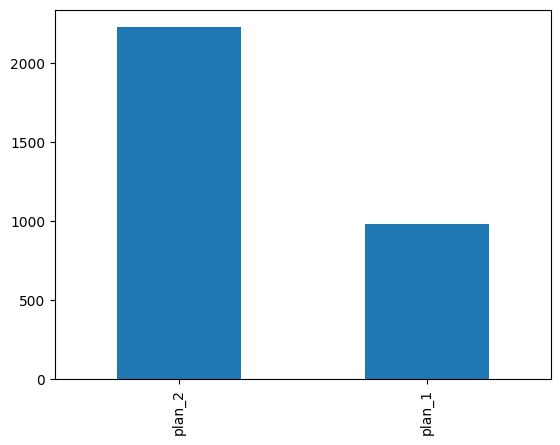

In [108]:
dataset['plan'].value_counts().plot(kind='bar')

<ipython-input-109-c67f03ce6b2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datasetcor= dataset.corr()


<Axes: >

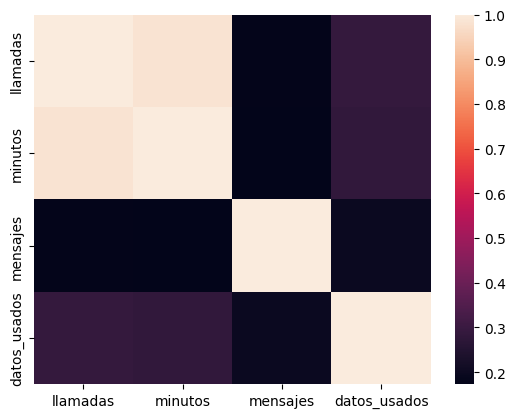

In [109]:
datasetcor= dataset.corr()
import seaborn as sns
sns.heatmap(datasetcor)

In [110]:
dataset.isna().sum()

llamadas        0
minutos         0
mensajes        0
datos_usados    0
plan            0
dtype: int64

## Codificación (transformación en variable dummy) de la variable objetivo (variable plan)

In [111]:
dummy_plan = pd.get_dummies(dataset["plan"], prefix  = "Plan")
dummy_plan.head

<bound method NDFrame.head of       Plan_plan_1  Plan_plan_2
0               0            1
1               0            1
2               0            1
3               1            0
4               0            1
...           ...          ...
3209            1            0
3210            0            1
3211            0            1
3212            0            1
3213            1            0

[3214 rows x 2 columns]>

In [112]:
dataset = dataset.drop(['plan'], axis = 1)
dataset = pd.concat([dataset,dummy_plan], axis = 1)

In [113]:
dataset = dataset.drop (['Plan_plan_2'], axis =1)
dataset

,llamadas,minutos,mensajes,datos_usados,Plan_plan_1
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


## Separación en variables independientes y variable de respuesta.

In [114]:
x = dataset.drop(columns='Plan_plan_1')
y = dataset['Plan_plan_1']

## Separación en conjuntos de entrenamiento y testeo (20% de testeo con random_state=12345).


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)

## Modelamiento y optimización de hiperparámetros (puede probar tantos como considere necesarios)

In [116]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)

In [117]:
def metrica(y_test, y_pred):
  print(f'f1_score: {f1_score(y_test, y_pred)}')

## Prueba del modelo. Tome el mejor modelo y realice una predicción sobre el conjunto de testeo. Calcule el f1_score.


In [118]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [119]:
param_grid = {'max_depth':[2,3,4,5,6,7,8,9,10],
              'min_samples_split':[4,5,6,7,8]}

In [120]:
tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)

In [121]:
tree_grid.fit(x_train,y_train)
ypred =tree_grid.predict(x_test)

In [122]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
metrica(y_test, y_pred)

f1_score: 0.6067415730337078


## Selección del modelo.


In [124]:
param_grid = {'n_estimators':[50, 100, 150, 200],
              'max_depth': [4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [5, 10, 15, 20],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 15, 20]}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3)
rf_grid.fit(x_train, y_train)
y_pred = rf_grid.predict(x_test)
metrica(y_test, y_pred)

f1_score: 0.6246246246246246


In [125]:
metrica(y_test, y_pred)

f1_score: 0.6246246246246246


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       447
           1       0.76      0.53      0.62       196

    accuracy                           0.81       643
   macro avg       0.79      0.73      0.75       643
weighted avg       0.80      0.81      0.79       643



## Análisis: Dado el modelamiento realizado, el F1-Score permite evidenciar que el plan 2 es el que arroja un F1-score más alto y por ende, es el plan más adecuado